In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config1 import weather_api_key
import time
from datetime import datetime
import requests
from scipy.stats import linregress

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c71e86542dafe1f473ac5b843a2f2d1


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
for coordinate in coordinates:
    print(coordinate [0], coordinate[1])

19.57015844571785 113.96665976747903
-39.69886059147009 104.4063709150306
-83.38335907358874 -34.30406171074762
13.070055697809082 107.43469827595226
45.806244849728586 73.07090515534765
-75.96657550302812 118.82028035572716
53.916580389570385 154.34577384018303
66.30464205323725 133.92153065900317
69.98083950441708 -0.8917740623479915
31.002469704259397 49.18870193222412
-63.9612675338371 -106.89351947087096
18.43959770315388 115.25548081023192
0.017684047983649975 -80.21899178769172
-13.05331632744766 -12.723680403352205
-83.48998016038932 0.007180753191505573
57.84906806852749 -17.811995825219952
23.629286463474358 45.37109524490771
-14.206191593972434 -168.77735662267952
-83.67562259010231 50.06328572589422
39.30931733661046 -60.66579683135356
1.5386143532556105 -166.7157975365369
44.90088814790883 150.9816729308592
51.54408221561903 -22.75439668397462
16.546347200067743 63.03658899049594
84.06536090492062 106.54152015510226
0.39989250213852756 -172.86024891433993
58.09082491834044

In [6]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

zhuhai cn
busselton au
ushuaia ar
lumphat kh
saryshagan kz
albany au
sobolevo ru
verkhoyansk ru
brae gb
ramshir ir
punta arenas cl
zhuhai cn
pedernales ec
georgetown sh
hermanus za
vestmannaeyjar is
riyadh sa
satitoa ws
port alfred za
halifax ca
saleaula ws
sentyabrskiy ru
vestmannaeyjar is
sur om
khatanga ru
saleaula ws
chapais ca
cape town za
kochevo ru
irtyshskiy ru
sorland no
rikitea pf
muros es
nanortalik gl
caravelas br
acapulco mx
lavrentiya ru
port blair in
cherskiy ru
pontian kecil my
ruatoria nz
ilulissat gl
albany au
albany au
green river us
mys shmidta ru
bluff nz
inirida co
cherskiy ru
port elizabeth za
punta arenas cl
punta arenas cl
busselton au
anori br
punta arenas cl
hambantota lk
fontenay-le-comte fr
kindu cd
mataura pf
narsaq gl
cidreira br
ushuaia ar
parrita cr
santa maria cv
arraial do cabo br
severo-kurilsk ru
saskylakh ru
bredasdorp za
vostok ru
hofn is
ribeira grande pt
bambous virieux mu
sofiysk ru
shubarshi kz
jutai br
dikson ru
awjilah ly
zhanaozen kz
nguiu 

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1c71e86542dafe1f473ac5b843a2f2d1


In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
print(cities)

['zhuhai', 'busselton', 'ushuaia', 'lumphat', 'saryshagan', 'albany', 'sobolevo', 'verkhoyansk', 'brae', 'ramshir', 'punta arenas', 'pedernales', 'georgetown', 'hermanus', 'vestmannaeyjar', 'riyadh', 'satitoa', 'port alfred', 'halifax', 'saleaula', 'sentyabrskiy', 'sur', 'khatanga', 'chapais', 'cape town', 'kochevo', 'irtyshskiy', 'sorland', 'rikitea', 'muros', 'nanortalik', 'caravelas', 'acapulco', 'lavrentiya', 'port blair', 'cherskiy', 'pontian kecil', 'ruatoria', 'ilulissat', 'green river', 'mys shmidta', 'bluff', 'inirida', 'port elizabeth', 'anori', 'hambantota', 'fontenay-le-comte', 'kindu', 'mataura', 'narsaq', 'cidreira', 'parrita', 'santa maria', 'arraial do cabo', 'severo-kurilsk', 'saskylakh', 'bredasdorp', 'vostok', 'hofn', 'ribeira grande', 'bambous virieux', 'sofiysk', 'shubarshi', 'jutai', 'dikson', 'awjilah', 'zhanaozen', 'nguiu', 'lebu', 'cumana', 'kelvington', 'hithadhoo', 'tuktoyaktuk', 'hobyo', 'baruun-urt', 'shamary', 'omsukchan', 'broome', 'hilo', 'yerbogachen', 

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Processing Record 1 of Set 1 | zhuhai
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | lumphat
Processing Record 5 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | sobolevo
Processing Record 8 of Set 1 | verkhoyansk
Processing Record 9 of Set 1 | brae
Processing Record 10 of Set 1 | ramshir
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | pedernales
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | vestmannaeyjar
Processing Record 16 of Set 1 | riyadh
Processing Record 17 of Set 1 | satitoa
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | halifax
Processing Record 20 of Set 1 | saleaula
City not found. Skipping...
Processing Record 21 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 22 of 

In [12]:
print(city_data)

[{'City': 'Zhuhai', 'Lat': 22.2769, 'Lng': 113.5678, 'Max Temp': 74.86, 'Humidity': 94, 'Cloudiness': 40, 'Wind Speed': 3.44, 'Country': 'CN', 'Date': '2022-04-10 23:12:11'}, {'City': 'Busselton', 'Lat': -33.65, 'Lng': 115.3333, 'Max Temp': 52.05, 'Humidity': 86, 'Cloudiness': 76, 'Wind Speed': 8.52, 'Country': 'AU', 'Date': '2022-04-10 23:03:19'}, {'City': 'Ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 42.46, 'Humidity': 65, 'Cloudiness': 75, 'Wind Speed': 3.44, 'Country': 'AR', 'Date': '2022-04-10 23:03:58'}, {'City': 'Lumphat', 'Lat': 13.4878, 'Lng': 106.9816, 'Max Temp': 72.07, 'Humidity': 77, 'Cloudiness': 57, 'Wind Speed': 2.93, 'Country': 'KH', 'Date': '2022-04-10 23:12:11'}, {'City': 'Albany', 'Lat': 42.6001, 'Lng': -73.9662, 'Max Temp': 43.36, 'Humidity': 64, 'Cloudiness': 86, 'Wind Speed': 4, 'Country': 'US', 'Date': '2022-04-10 23:07:17'}, {'City': 'Sobolevo', 'Lat': 54.4299, 'Lng': 31.8996, 'Max Temp': 39.72, 'Humidity': 70, 'Cloudiness': 100, 'Wind Speed': 5.19, 'Count

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhuhai,22.2769,113.5678,74.86,94,40,3.44,CN,2022-04-10 23:12:11
1,Busselton,-33.6500,115.3333,52.05,86,76,8.52,AU,2022-04-10 23:03:19
2,Ushuaia,-54.8000,-68.3000,42.46,65,75,3.44,AR,2022-04-10 23:03:58
3,Lumphat,13.4878,106.9816,72.07,77,57,2.93,KH,2022-04-10 23:12:11
4,Albany,42.6001,-73.9662,43.36,64,86,4.00,US,2022-04-10 23:07:17
5,Sobolevo,54.4299,31.8996,39.72,70,100,5.19,RU,2022-04-10 23:12:12
6,Verkhoyansk,67.5447,133.3850,0.61,96,92,3.09,RU,2022-04-10 23:12:12
7,Brae,60.3964,-1.3530,36.41,63,100,3.29,GB,2022-04-10 23:12:12
8,Ramshir,30.8946,49.4092,75.22,14,44,9.28,IR,2022-04-10 23:12:13
9,Punta Arenas,-53.1500,-70.9167,46.51,66,0,5.75,CL,2022-04-10 23:03:49


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

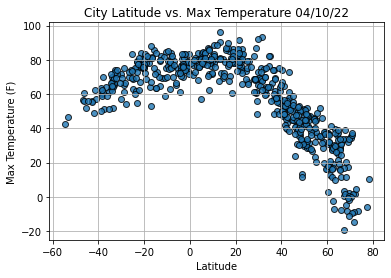

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

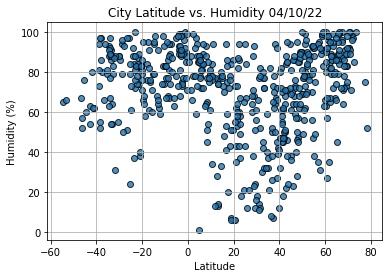

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


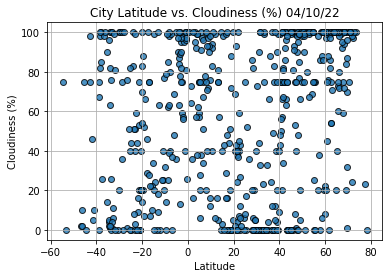

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

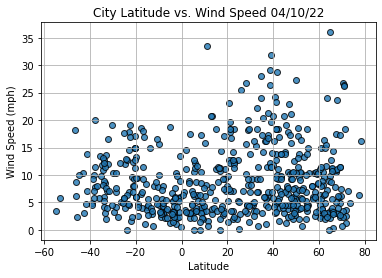

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()


In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhuhai,22.2769,113.5678,74.86,94,40,3.44,CN,2022-04-10 23:12:11
3,Lumphat,13.4878,106.9816,72.07,77,57,2.93,KH,2022-04-10 23:12:11
4,Albany,42.6001,-73.9662,43.36,64,86,4.00,US,2022-04-10 23:07:17
5,Sobolevo,54.4299,31.8996,39.72,70,100,5.19,RU,2022-04-10 23:12:12
6,Verkhoyansk,67.5447,133.3850,0.61,96,92,3.09,RU,2022-04-10 23:12:12
...,...,...,...,...,...,...,...,...,...
560,Iwaki,37.0500,140.8833,68.61,65,49,1.01,JP,2022-04-10 23:27:08
561,Wilmington,34.2257,-77.9447,64.31,32,0,9.22,US,2022-04-10 23:24:10
562,Kuusankoski,60.9070,26.6244,36.12,92,75,11.50,FI,2022-04-10 23:27:08
563,Topeka,39.0483,-95.6780,75.11,27,0,11.50,US,2022-04-10 23:24:17


In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhuhai,22.2769,113.5678,74.86,94,40,3.44,CN,2022-04-10 23:12:11
3,Lumphat,13.4878,106.9816,72.07,77,57,2.93,KH,2022-04-10 23:12:11
4,Albany,42.6001,-73.9662,43.36,64,86,4.00,US,2022-04-10 23:07:17
5,Sobolevo,54.4299,31.8996,39.72,70,100,5.19,RU,2022-04-10 23:12:12
6,Verkhoyansk,67.5447,133.3850,0.61,96,92,3.09,RU,2022-04-10 23:12:12
...,...,...,...,...,...,...,...,...,...
560,Iwaki,37.0500,140.8833,68.61,65,49,1.01,JP,2022-04-10 23:27:08
561,Wilmington,34.2257,-77.9447,64.31,32,0,9.22,US,2022-04-10 23:24:10
562,Kuusankoski,60.9070,26.6244,36.12,92,75,11.50,FI,2022-04-10 23:27:08
563,Topeka,39.0483,-95.6780,75.11,27,0,11.50,US,2022-04-10 23:24:17


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhuhai,22.2769,113.5678,74.86,94,40,3.44,CN,2022-04-10 23:12:11
3,Lumphat,13.4878,106.9816,72.07,77,57,2.93,KH,2022-04-10 23:12:11
4,Albany,42.6001,-73.9662,43.36,64,86,4.00,US,2022-04-10 23:07:17
5,Sobolevo,54.4299,31.8996,39.72,70,100,5.19,RU,2022-04-10 23:12:12
6,Verkhoyansk,67.5447,133.3850,0.61,96,92,3.09,RU,2022-04-10 23:12:12


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


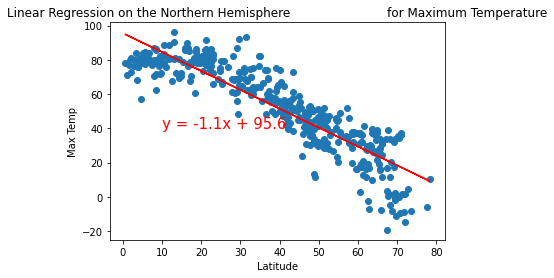

In [27]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

SyntaxError: EOL while scanning string literal (518375573.py, line 6)

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))